# 012. Seaborn Introduction

### Seaborn 이 해결해 주는 2 가지 matplotlib 의 문제

- Default Matplotlib parameters

- dataframe 을 이용할 경우의 문제 (Matplotlib 은 pandas 에 최적화된 plot 제공 않음)

### Seaborn 은 Matplotlib 의 대체품이 아니라 보완품이지만 다음의 중요한 feature 를 포함하고 있다.

- 내장된 테마  

- univariate 및 bivariate data 시각화  

- linear regression model 의 fitting 및 시각화  

- 통계적 시계열 data 의 plotting  

- Numpy 및 Pandas DataFrame 과 잘 연동  

- Matplotlib graphic 의 내장 theme 포함

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 1

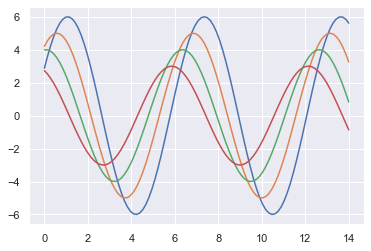

In [40]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 5):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        
sinplot()

### seaborn default 로 setting

- `set()` : alias of `set_theme()`

- 한 번에 여러 테마 매개 변수를 설정합니다.

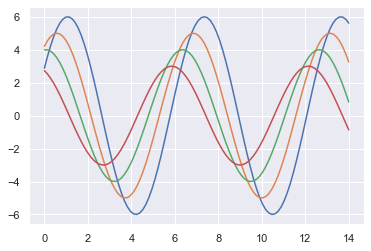

In [41]:
sns.set()
sinplot()

### seaborn 의 style 테마 

- Darkgrid : default  
- Whitegrid 
- Dark  
- White  
- Ticks

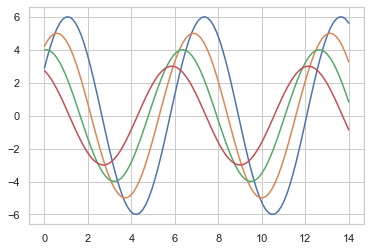

In [42]:
sns.set_style("whitegrid")
sinplot()

### axis 의 top, right spine 제거

- despine : 플롯에서 상단 및 오른쪽 스파인 제거.

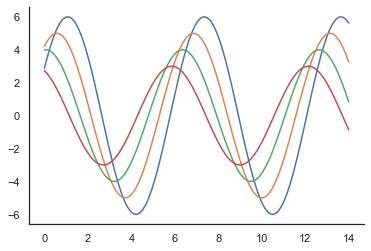

In [43]:
sns.set_style("white")
fig, ax = plt.subplots()
sns.despine()
sinplot()

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 2

* random walk data

In [44]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
x.shape, y.shape

((500,), (500, 6))

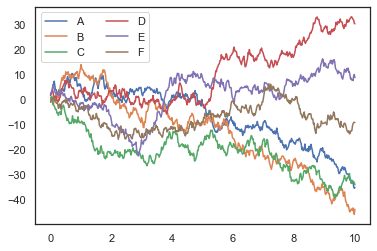

In [45]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

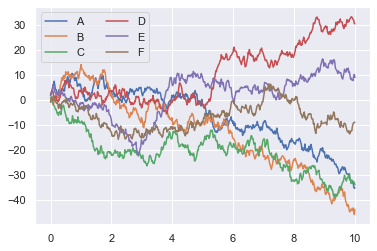

In [46]:
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 3

- tips dataset 에서 요일별 평균 팁 금액을 남, 녀 고객 별 비교

In [47]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
# day 가 category type 인지 확인
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## matplotlib - bar chart

- Hard Way

In [49]:
x = np.arange(len(tips['day'].cat.categories))
x

array([0, 1, 2, 3])

In [50]:
tip1 = tips[tips['sex'] == 'Male'].groupby('day').mean()['tip']
tip2 = tips[tips['sex'] == 'Female'].groupby('day').mean()['tip']

In [51]:
days = tips['day'].cat.categories
days

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

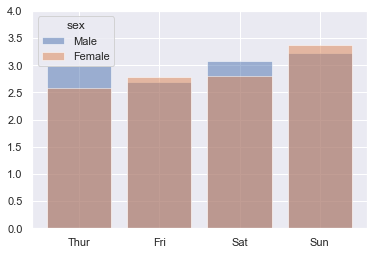

In [52]:
fig, ax = plt.subplots()
ax.bar(x, tip1, label='Male', tick_label=days, alpha=0.5)
ax.bar(x, tip2, label='Female', alpha=0.5)
ax.set_ylim([0, 4])
plt.legend(title="sex");

- bar 의 사각형 범위를 조절하여 서로 겹치지 않도록 한다.

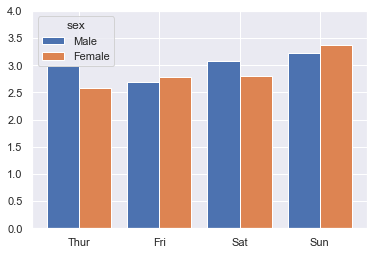

In [53]:
fig, ax = plt.subplots()
ax.bar(x, tip1, width=-0.4, label='Male', tick_label=days, align='edge')
ax.bar(x, tip2, width=0.4, label='Female', align='edge')
ax.set_ylim([0, 4])
plt.legend(title="sex")

## Seaborn - barplot

- Easy Way

- 포인트 추정치 및 신뢰 구간을 직사각형 막대로 표시 : 95% 신뢰구간

<AxesSubplot:xlabel='day', ylabel='tip'>

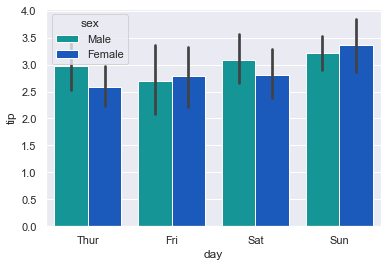

In [54]:
sns.barplot(x="day", y="tip", data=tips, hue="sex", palette="winter_r")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

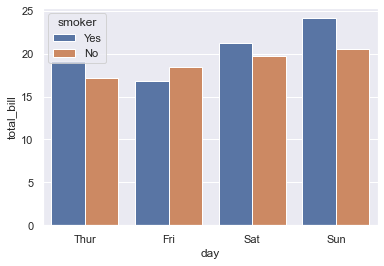

In [55]:
sns.barplot(x="day", y="total_bill", data=tips, hue="smoker", ci=None) #ci - 신뢰구간

<AxesSubplot:xlabel='total_bill', ylabel='day'>

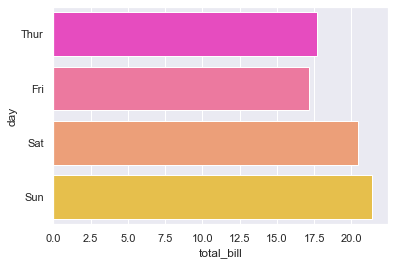

In [56]:
sns.barplot(y="day", x="total_bill", data=tips, palette='spring', ci=None)

## 통계적 추론 (Statistical Estimation) 과 관련된 plot 들

- 전체 data 의 분포에 대한 plotting 

- 중심경향 추론(central tendency estimation) 에 사용되는 mean 과 median 에 관련된 plot 들

### boxplot - 범주와 관련된 분포를 표시하는 상자 그림

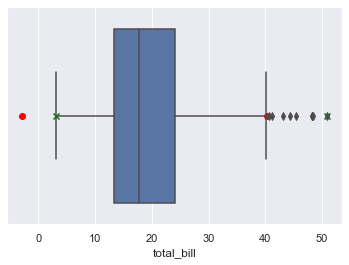

In [57]:
q1 = tips["total_bill"].quantile(0.25)
q3 = tips["total_bill"].quantile(0.75)
min_value = tips["total_bill"].min()
max_value = tips["total_bill"].max()
iqr = q3 - q1
limit_lower = q1 - 1.5*iqr
limit_upper = q3 + 1.5*iqr
ax = sns.boxplot(x=tips["total_bill"])
plt.scatter(limit_lower, 0, color='red')
plt.scatter(limit_upper, 0, color='red')
plt.scatter(min_value, 0, color='green', marker='x')
plt.scatter(max_value, 0, color='green', marker='x')
plt.show()

### Violine Plot

- box plot + kde (kernel density estimation) 을 하여 data 의 분포를 쉽게 파악할 수 있도록 한다.

- box plot 의 사분위수와 whisker 가 violin 내에 표시된다.  

- violin plot 이 kde 를 이용하므로 넓은 부분이 high density 이고, 좁은 부분이 low density 이다.  

- Box plot 의 사분위간 범위(Inter-Quartile range) 와 kde 의 higher density 부분이 같은 영역으로 일치한다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

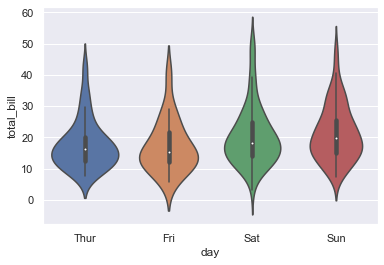

In [58]:
# 요일별 total bill 금액 분포
sns.violinplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

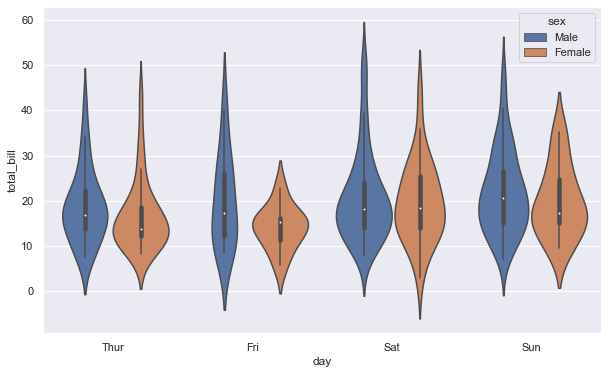

In [59]:
# 요일별 성별 total bill 분포
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips)

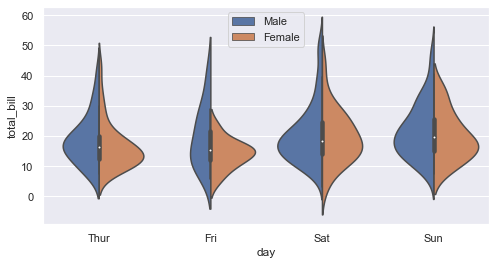

In [60]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True);
ax.legend(loc="upper center")

## 변수 한개 (Univariate) 의 분포를 그리는 기능

### Histogram

In [61]:
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

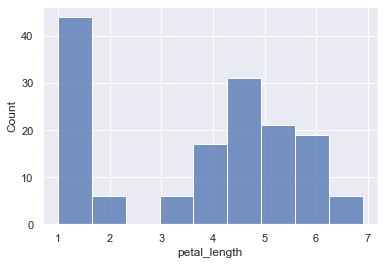

In [62]:
sns.histplot(df['petal_length'])

커널 밀도 추정 (KDE) 플롯은 히스토그램에 대한 분석인 데이터세트의 관측 값 분포를 시각화. KDE는 하나 이상의 차원에서 연속 확률 밀도 곡선을 사용하여 데이터를 나타냅니다.

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

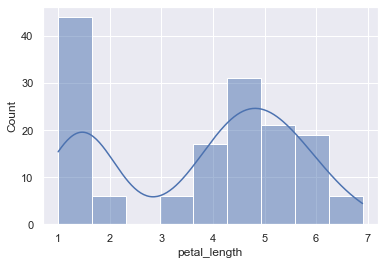

In [26]:
sns.histplot(df['petal_length'], kde=True)

## 변수두개(bivariate) 분포를 그리는 기능

### Histogram using Matplotlib

- multivariate_normal(mean, cov, size)  

In [27]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,0.379670,-2.727218
1,-1.886929,0.050373
2,1.886606,0.928163
3,-1.467808,0.340477
4,-0.503794,-2.681963


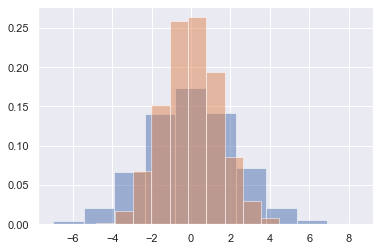

In [28]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

### kde plot using seaborn

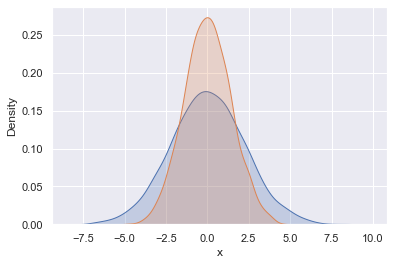

In [29]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

<AxesSubplot:xlabel='x', ylabel='Count'>

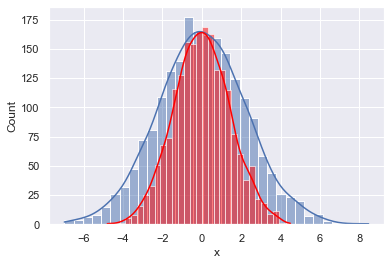

In [30]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True, color='red')

<AxesSubplot:xlabel='x', ylabel='y'>

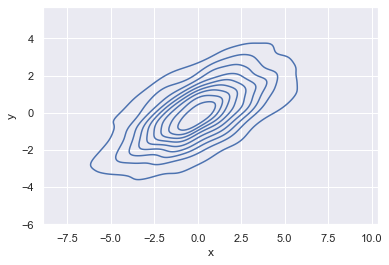

In [31]:
sns.kdeplot(x=data['x'], y=data['y'])

### jointplot()

### Joint Scatter Plot

-  `scatterplot` + `marginal histograms`  


- `kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }`

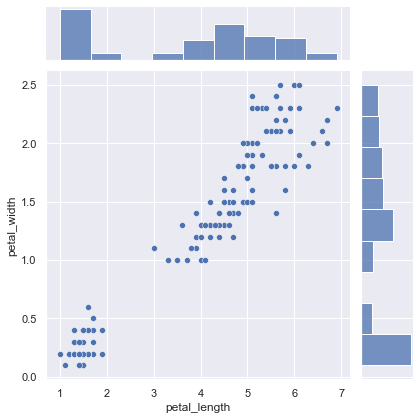

In [32]:
sns.jointplot(x='petal_length', y='petal_width', data=df);

### Hexbin Plot

- Hexaginal binning 은 data 밀도가 sparse 한 경우의 bivariate data 분석에 사용  
    ==> data 가 너무 퍼져있어서 scatter plot 으로 분석하기 어려운 경우 사용

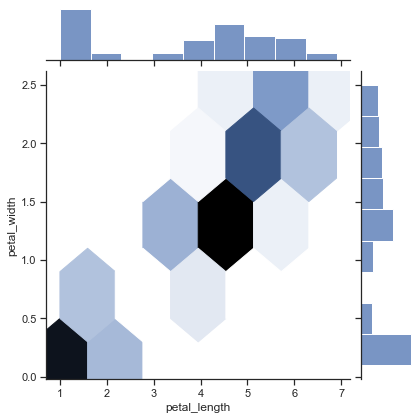

In [33]:
with sns.axes_style('ticks'):  #ticks, whitegrid, white
    sns.jointplot(x='petal_length', y='petal_width', 
                  data=df, kind='hex');

### Kernel Density Eestimation

- variable 의 분포를 보는 방법

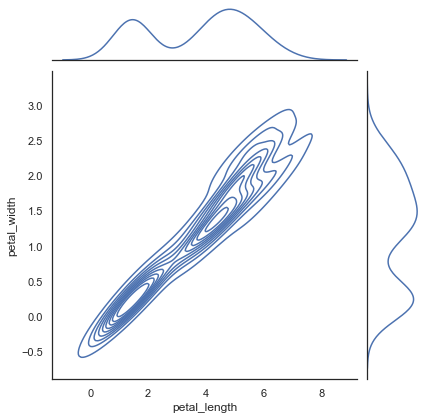

In [34]:
with sns.axes_style('white'):
    sns.jointplot(x='petal_length', y='petal_width', 
                  data=df, kind='kde')

### Pairwise Relationship

- 다변량 분석의 경우 각각의 변수를 짝지워 Bivariate Distribution 표시 - (n, 2) combination  

- sns.pairplot()

- hue : 색깔 구분을 할 변수  

- diag_kind : 대각선에 배치할 subplots (hist or kde)

In [35]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


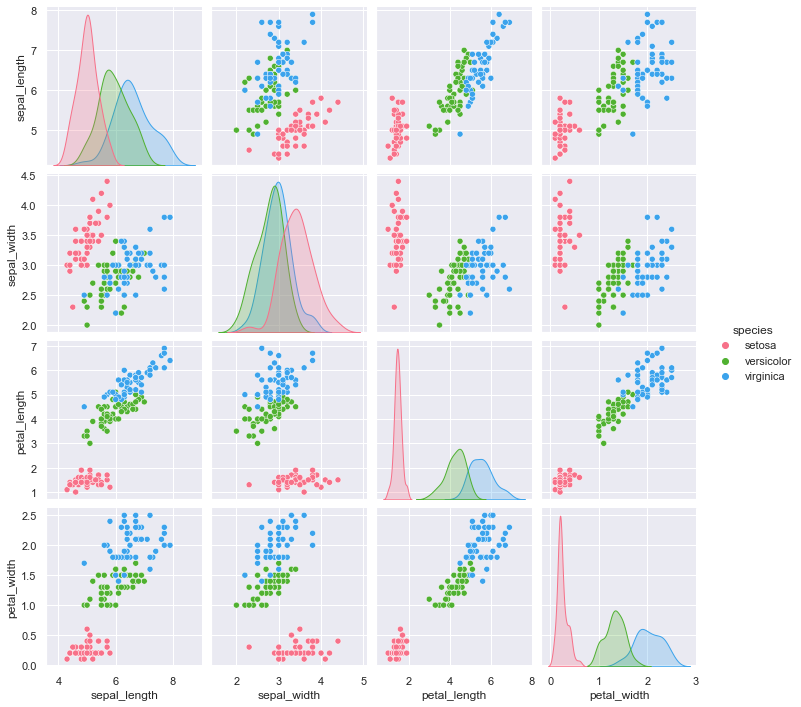

In [36]:
sns.pairplot(df, hue='species', diag_kind='kde', 
             kind='scatter', palette='husl')

## Categorical Data plotting 

- 지금까지 위에서 그린 것은 연속된 값을 plot 한 것이므로, categorical variable 에는 적합하지 않음  

### stripplot : 하나의 변수가 범주형인 산점도

<AxesSubplot:xlabel='species', ylabel='petal_length'>

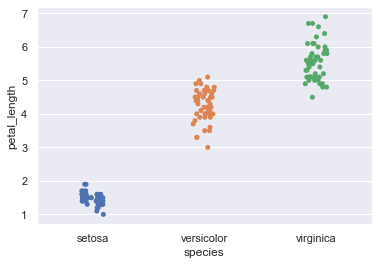

In [37]:
sns.stripplot(x='species', y='petal_length', data=df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

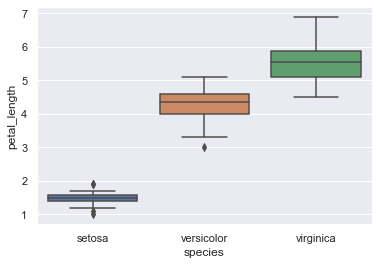

In [38]:
sns.boxplot(x='species', y='petal_length', data=df)